In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
np.random.seed(2003)
columns = [str(x).zfill(2) for x in range(10)]

data = {}
for idx in columns:
    data[idx] = [0]*20

map_df = pd.DataFrame(data)
map_df.index = [str(x).zfill(2) for x in range(20)]

for i in range(map_df.shape[0]):
    for j in range(map_df.shape[1]):
        map_df.iloc[i,j] = np.random.randn(1)

matplotlib

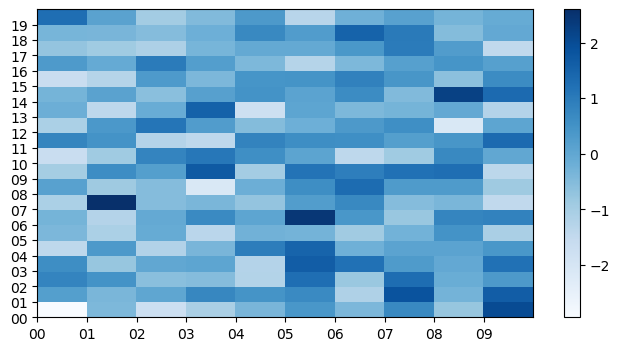

In [3]:
fig = plt.figure(figsize=(8,4))
fig.set_facecolor('white')

plt.pcolor(map_df.values, cmap='Blues')
plt.xticks(range(len(map_df.columns)), map_df.columns)
plt.yticks(range(len(map_df.index)), map_df.index)

plt.colorbar()
plt.show()

seaborn

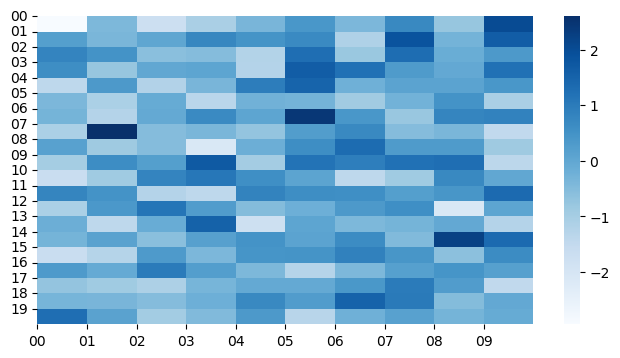

In [4]:
fig = plt.figure(figsize=(8,4))
fig.set_facecolor('white')

sns.heatmap(map_df, cmap='Blues')
plt.xticks(range(len(map_df.columns)), map_df.columns)
plt.yticks(range(len(map_df.index)), map_df.index)
plt.show()

seaborn with text

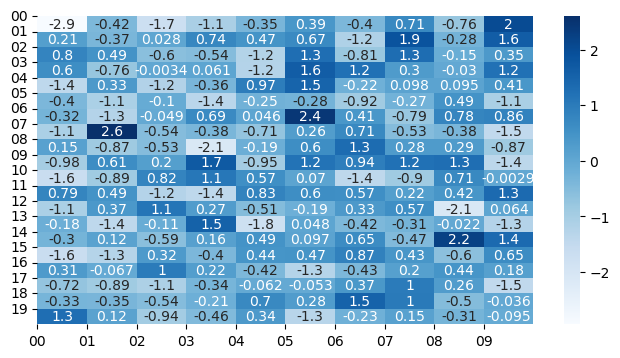

In [5]:
fig = plt.figure(figsize=(8,4))
fig.set_facecolor('white')

sns.heatmap(map_df, cmap='Blues', annot=True)
plt.xticks(range(len(map_df.columns)), map_df.columns)
plt.yticks(range(len(map_df.index)), map_df.index)
plt.show()

car crashes data

In [6]:
df = sns.load_dataset('car_crashes')

In [7]:
display(df.head())

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


In [8]:
display(df.corr())

C:\Users\hanna\AppData\Local\Temp\ipykernel_14844\1051350478.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  display(df.corr())


,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
total,1.000000,0.611548,0.852613,0.827560,0.956179,-0.199702,-0.036011
speeding,0.611548,1.000000,0.669719,0.588010,0.571976,-0.077675,-0.065928
alcohol,0.852613,0.669719,1.000000,0.732816,0.783520,-0.170612,-0.112547
not_distracted,0.827560,0.588010,0.732816,1.000000,0.747307,-0.174856,-0.075970
no_previous,0.956179,0.571976,0.783520,0.747307,1.000000,-0.156895,-0.006359
ins_premium,-0.199702,-0.077675,-0.170612,-0.174856,-0.156895,1.000000,0.623116
ins_losses,-0.036011,-0.065928,-0.112547,-0.075970,-0.006359,0.623116,1.000000


In [9]:
encoded_df = pd.get_dummies(df, columns=['abbrev'])

In [10]:
display(encoded_df.head())

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev_AK,abbrev_AL,abbrev_AR,...,abbrev_SD,abbrev_TN,abbrev_TX,abbrev_UT,abbrev_VA,abbrev_VT,abbrev_WA,abbrev_WI,abbrev_WV,abbrev_WY
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,0,0,0,...,0,0,0,0,0,0,0,0,0,0


C:\Users\hanna\AppData\Local\Temp\ipykernel_14844\104123220.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='Reds', annot=True)


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 [Text(0.5, 0, 'total'),
  Text(1.5, 0, 'speeding'),
  Text(2.5, 0, 'alcohol'),
  Text(3.5, 0, 'not_distracted'),
  Text(4.5, 0, 'no_previous'),
  Text(5.5, 0, 'ins_premium'),
  Text(6.5, 0, 'ins_losses')])

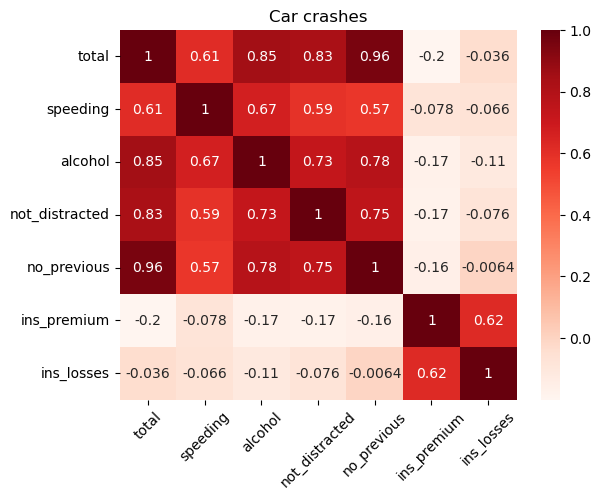

In [11]:
sns.heatmap(df.corr(), cmap='Reds', annot=True)
plt.title('Car crashes')
plt.xticks(rotation=45)

In [12]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
df_new = pca.fit_transform(encoded_df)
df_new = pd.DataFrame(df_new)
display(df_new)

,0,1
0,-101.126107,19.626728
1,165.796071,-14.905887
2,10.315347,-24.926145
3,-58.784308,13.517918
4,-5.747292,31.520101
5,-50.757212,9.754295
6,183.975999,16.215303
7,251.417765,-4.893905
8,385.688085,-32.745327
9,272.933865,-14.001173


In [13]:
pca.explained_variance_ratio_

array([0.98668573, 0.01155084])

In [14]:
pca.explained_variance_ratio_.sum()

0.9982365698294579

In [15]:
display(df_new.corr())

,0,1
0,1.000000e+00,9.545067e-17
1,9.545067e-17,1.000000e+00


([<matplotlib.axis.XTick at 0x288ffdaa230>,
 [Text(0.5, 0, '1st var'), Text(1.5, 0, '2nd var')])

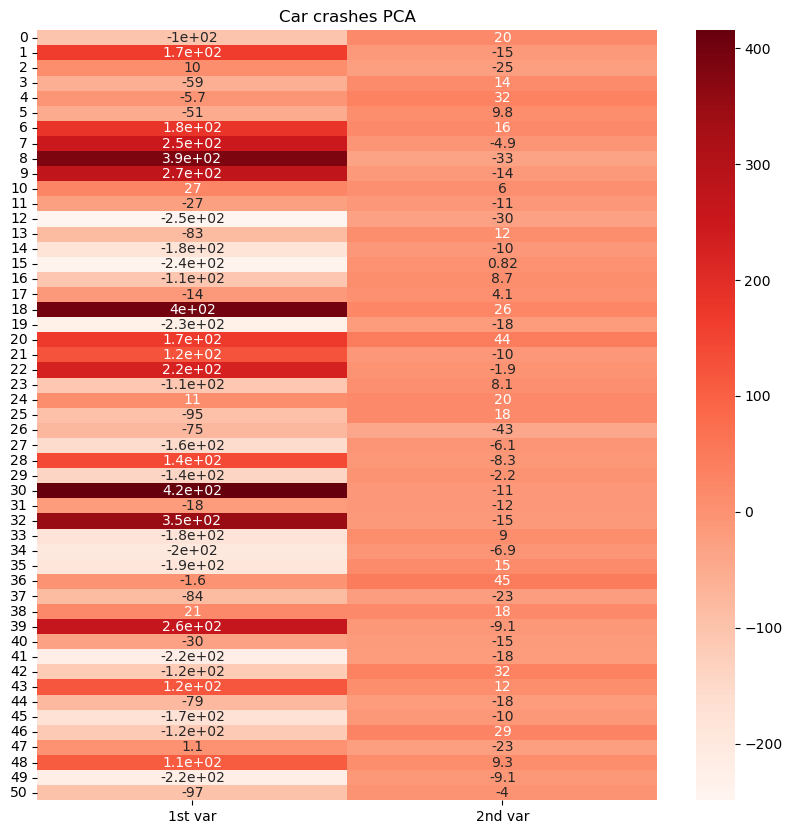

In [16]:
plt.figure(figsize=(10,10))
sns.heatmap(df_new, cmap='Reds', annot=True)
plt.title('Car crashes PCA')
plt.xticks(ticks=[0.5, 1.5], labels=['1st var', '2nd var'])